#### 1. Importação das bibliotecas necessárias (pandas, numpy, matplotlib, seaborn, scipy.stats).

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


#### 2. Carregamento do arquivo CSV em um DataFrame.

In [57]:

df = pd.read_csv('campeonato-brasileiro-full.csv')



#### 3. Visualização das primeiras linhas do DataFrame (head).

In [58]:

display(df.head())

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,1,1,2003-03-29,16:00,Sabado,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,brinco de ouro,4,2,SP,RJ,SP
1,2,1,2003-03-29,16:00,Sabado,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,arena da baixada,2,0,PR,RS,PR
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-
3,4,1,2003-03-30,16:00,Domingo,Goias,Paysandu,NaN,NaN,NaN,NaN,-,serra dourada,2,2,GO,PA,-
4,5,1,2003-03-30,16:00,Domingo,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,beira rio,1,1,RS,SP,-


#### 4. Verificação de informações gerais (info, shape, tipos de dados, valores nulos).

In [59]:
df.info
display(df.shape)
display(df.dtypes)
display(df.isnull())

(7645, 18)

ID                     int64
rodada                 int64
data                  object
hora                  object
dia                   object
mandante              object
visitante             object
formacao_mandante     object
formacao_visitante    object
tecnico_mandante      object
tecnico_visitante     object
vencedor              object
arena                 object
mandante_placar        int64
visitante_placar       int64
mandante_estado       object
visitante_estado      object
estado_vencedor       object
dtype: object

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
0,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7640,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7641,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### 5. Estatísticas descritivas básicas (describe).

In [60]:
display(df.describe())

,ID,rodada,mandante_placar,visitante_placar
count,7645.000000,7645.000000,7645.000000,7645.000000
mean,3823.000000,20.196207,1.554088,1.027338
std,2207.065737,11.489249,1.234262,1.030366
min,1.000000,1.000000,0.000000,0.000000
25%,1912.000000,10.000000,1.000000,0.000000
50%,3823.000000,20.000000,1.000000,1.000000
75%,5734.000000,30.000000,2.000000,2.000000
max,7645.000000,46.000000,7.000000,7.000000


#### 6. Contagem de valores ausentes por coluna.

In [61]:
df.isnull().sum()

ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64

#### 7. Tratamento de valores ausentes (ex.: substituição, -remoção- ou imputação).

In [62]:
df_cleaned = df.dropna()
df_cleaned.isnull().sum()

ID                    0
rodada                0
data                  0
hora                  0
dia                   0
mandante              0
visitante             0
formacao_mandante     0
formacao_visitante    0
tecnico_mandante      0
tecnico_visitante     0
vencedor              0
arena                 0
mandante_placar       0
visitante_placar      0
mandante_estado       0
visitante_estado      0
estado_vencedor       0
dtype: int64

#### 8. Identificação de outliers (ex.: Z-Score em mandante_placar e visitante_placar).

In [63]:
z = np.abs(stats.zscore(df['mandante_placar']))

threshold = 3
outliers_mandante = df[z > threshold]

display(outliers_mandante)

print("-----")

z2 = np.abs(stats.zscore(df['visitante_placar']))

threshold = 3
outliers_visitante = df[z2 > threshold]

display(outliers_visitante)

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
23,24,2,2003-04-06,18:00,Domingo,Vasco,Goias,NaN,NaN,NaN,NaN,Vasco,sao januario,6,4,RJ,GO,RJ
27,40,3,2003-04-12,18:00,Sabado,Corinthians,Paysandu,NaN,NaN,NaN,NaN,Corinthians,pacaembu,6,1,SP,PA,SP
65,66,6,2003-04-27,16:00,Domingo,Goias,Juventude,NaN,NaN,NaN,NaN,Goias,serra dourada,7,0,GO,RS,GO
125,126,11,2003-06-01,16:00,Domingo,Parana,Flamengo,NaN,NaN,NaN,NaN,Parana,pinheirao,6,2,PR,RJ,PR
270,271,23,2003-08-03,16:00,Domingo,Paysandu,Guarani,NaN,NaN,NaN,NaN,Paysandu,mangueirao,6,1,PA,SP,PA
284,285,24,2003-08-07,20:30,Quinta-feira,Flamengo,Bahia,NaN,NaN,NaN,NaN,Flamengo,maracana,6,0,RJ,BA,RJ
391,392,33,2003-09-28,16:00,Domingo,Juventude,Corinthians,NaN,NaN,NaN,NaN,Juventude,alfredo jaconi,6,1,RS,SP,RS
427,428,36,2003-10-12,16:00,Domingo,Goias,Fluminense,NaN,NaN,NaN,NaN,Goias,serra dourada,6,1,GO,RJ,GO
476,477,40,2003-11-02,16:00,Domingo,Figueirense,Paysandu,NaN,NaN,NaN,NaN,Figueirense,orlando scarpelli,6,0,SC,PA,SC
573,574,2,2004-04-25,17:00,Domingo,Vitoria,Parana,NaN,NaN,NaN,NaN,Vitoria,barradao,6,1,BA,PR,BA


-----


,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor
450,451,38,2003-10-22,21:40,Quarta-feira,Bahia,Santos,NaN,NaN,NaN,NaN,Santos,fonte nova,4,7,BA,SP,SP
547,548,46,2003-12-14,16:00,Domingo,Bahia,Cruzeiro,NaN,NaN,NaN,NaN,Cruzeiro,fonte nova,0,7,BA,MG,MG
634,635,7,2004-05-23,18:00,Domingo,Corinthians,Athletico-PR,NaN,NaN,NaN,NaN,Athletico-PR,pacaembu,0,5,SP,PR,PR
930,931,32,2004-09-26,16:00,Domingo,Vasco,Palmeiras,NaN,NaN,NaN,NaN,Palmeiras,sao januario,2,5,RJ,SP,SP
977,978,36,2004-10-17,16:00,Domingo,Atletico-MG,Sao Paulo,NaN,NaN,NaN,NaN,Sao Paulo,independencia,0,5,MG,SP,SP
1132,1133,3,2005-05-08,16:00,Domingo,Corinthians,Sao Paulo,NaN,NaN,NaN,NaN,Sao Paulo,pacaembu,1,5,SP,SP,SP
1316,1317,20,2005-08-14,16:00,Domingo,Ponte Preta,Corinthians,NaN,NaN,NaN,NaN,Corinthians,moises lucarelli,3,5,SP,SP,SP
1362,1363,24,2005-09-07,21:45,Quarta-feira,Cruzeiro,Fluminense,NaN,NaN,NaN,NaN,Fluminense,mineirao,2,6,MG,RJ,RJ
1453,1454,32,2005-10-16,16:00,Domingo,Flamengo,Sao Paulo,NaN,NaN,NaN,NaN,Sao Paulo,luso brasileiro,1,6,RJ,SP,SP
1542,1543,40,2005-11-20,18:10,Domingo,Ponte Preta,Palmeiras,NaN,NaN,NaN,NaN,Palmeiras,moises lucarelli,2,6,SP,SP,SP


#### 9. Remoção ou tratamento dos outliers identificados.

In [64]:
df.loc[z > threshold, 'mandante_placar'] = df['mandante_placar'].median()

df.loc[z > threshold, 'visitante_placar'] = df['visitante_placar'].median()

#### 10. Normalização de uma coluna numérica (ex.: rodada ou placares com Min-Max Scaling).

In [65]:

scaler = MinMaxScaler()

df['rodada_normalizada'] = scaler.fit_transform(df[['rodada']])

print(df[['rodada', 'rodada_normalizada']].head())


   rodada  rodada_normalizada
0       1                 0.0
1       1                 0.0
2       1                 0.0
3       1                 0.0
4       1                 0.0


#### 11. Codificação de variáveis categóricas (ex.: mandante_estado, visitante_estado, vencedor com One-Hot Encoding).

In [66]:

encoder = OneHotEncoder(sparse_output=False)

encoded = encoder.fit_transform(df[['mandante_estado', 'visitante_estado', 'vencedor']])

df_encoded = pd.DataFrame(
    encoded, 
    columns=encoder.get_feature_names_out(['mandante_estado', 'visitante_estado', 'vencedor'])
)

print(df_encoded.head())



   mandante_estado_AL  mandante_estado_BA  mandante_estado_CE  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   mandante_estado_DF  mandante_estado_GO  mandante_estado_MG  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 1.0                 0.0   
4                 0.0                 0.0                 0.0   

   mandante_estado_MT  mandante_estado_PA  mandante_estado_PE  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0  

#### 12. Criação de matriz de correlação (focando nos placares e rodadas).

                    rodada  mandante_placar  visitante_placar
rodada            1.000000         0.028868          0.001641
mandante_placar   0.028868         1.000000          0.056265
visitante_placar  0.001641         0.056265          1.000000


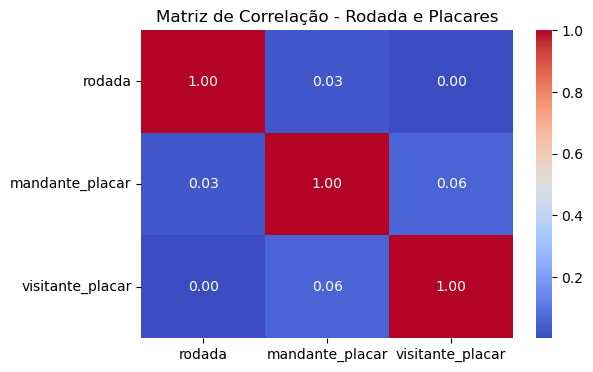

In [67]:
df_corr = df[['rodada', 'mandante_placar', 'visitante_placar']]

corr_matrix = df_corr.corr()

print(corr_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Rodada e Placares")
plt.show()

#### 13. Gráfico de dispersão (ex.: placar mandante vs. placar visitante).

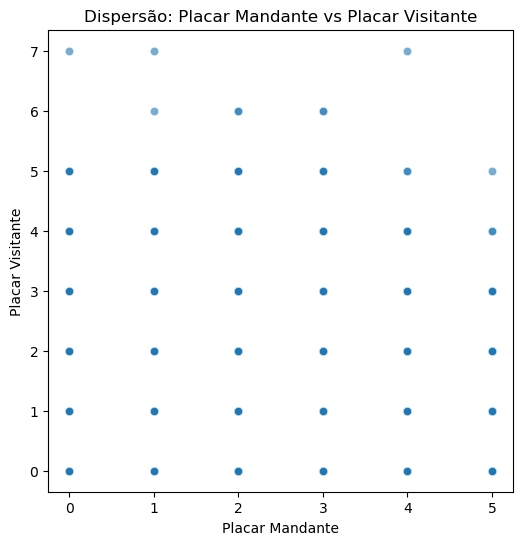

In [68]:

plt.figure(figsize=(6,6))
sns.scatterplot(
    x=df['mandante_placar'], 
    y=df['visitante_placar'],
    alpha=0.6
)

plt.title("Dispersão: Placar Mandante vs Placar Visitante")
plt.xlabel("Placar Mandante")
plt.ylabel("Placar Visitante")
plt.show()

#### 14. Filtragem de dados com base em uma condição (ex.: jogos do Flamengo como mandante).

In [69]:
jogos_fla_mandante = df[df['mandante'] == 'Flamengo']

display(jogos_fla_mandante.head())

,ID,rodada,data,hora,dia,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,estado_vencedor,rodada_normalizada
2,3,1,2003-03-30,16:00,Domingo,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,PR,-,0.000000
35,48,3,2003-04-13,18:00,Domingo,Flamengo,Fluminense,NaN,NaN,NaN,NaN,Flamengo,maracana,4,1,RJ,RJ,RJ,0.044444
50,51,5,2003-04-19,18:00,Sabado,Flamengo,Santos,NaN,NaN,NaN,NaN,Santos,maracana,0,2,RJ,SP,SP,0.088889
72,73,7,2003-05-03,16:00,Sabado,Flamengo,Vitoria,NaN,NaN,NaN,NaN,Flamengo,maracana,2,1,RJ,BA,RJ,0.133333
106,107,9,2003-05-18,18:00,Domingo,Flamengo,Guarani,NaN,NaN,NaN,NaN,-,maracana,1,1,RJ,SP,-,0.177778


#### 15. Exportação do DataFrame processado para CSV.

In [70]:
df.to_csv("dados_processados.csv", index=False)


#### 16. Conversão da coluna de datas (data) para tipo datetime e extração de novas colunas (ano, mês).

In [71]:
df['data'] = pd.to_datetime(df['data'], dayfirst=True, errors='coerce')

df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

display(df[['data', 'ano', 'mes']].head())

C:\Users\Inteli\AppData\Local\Temp\ipykernel_28628\1701735272.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['data'] = pd.to_datetime(df['data'], dayfirst=True, errors='coerce')


,data,ano,mes
0,2003-03-29,2003,3
1,2003-03-29,2003,3
2,2003-03-30,2003,3
3,2003-03-30,2003,3
4,2003-03-30,2003,3


#### 17. Agrupamento dos dados (ex.: número de vitórias por estado, ou por time).

In [72]:
df['estado_vencedor'] = df.apply(
    lambda row: row['mandante_estado'] if row['mandante_placar'] > row['visitante_placar']
    else (row['visitante_estado'] if row['visitante_placar'] > row['mandante_placar'] else 'Empate'),
    axis=1
)

vitorias_por_estado = df[df['estado_vencedor'] != 'Empate'].groupby('estado_vencedor').size().reset_index(name='vitorias')

display(vitorias_por_estado)

,estado_vencedor,vitorias
0,AL,8
1,BA,235
2,CE,143
3,DF,10
4,GO,250
5,MG,630
6,MT,10
7,PA,40
8,PE,200
9,PR,524


#### 18. Criação de colunas derivadas (ex.: diferença de gols = mandante_placar - visitante_placar).

In [73]:
df['diferenca_gols'] = df['mandante_placar'] - df['visitante_placar']

df['total_gols'] = df['mandante_placar'] + df['visitante_placar']

df['vitoria_mandante'] = (df['mandante_placar'] > df['visitante_placar']).astype(int)

df['vitoria_visitante'] = (df['visitante_placar'] > df['mandante_placar']).astype(int)

df['empate'] = (df['mandante_placar'] == df['visitante_placar']).astype(int)

display(df[['mandante_placar','visitante_placar','diferenca_gols','total_gols','vitoria_mandante','vitoria_visitante','empate']].head())


,mandante_placar,visitante_placar,diferenca_gols,total_gols,vitoria_mandante,vitoria_visitante,empate
0,4,2,2,6,1,0,0
1,2,0,2,2,1,0,0
2,1,1,0,2,0,0,1
3,2,2,0,4,0,0,1
4,1,1,0,2,0,0,1


#### 19. Visualização com gráficos de barras (ex.: número de vitórias por time ou por técnico).

In [74]:
df['time_vencedor'] = df.apply(
    lambda row: row['mandante'] if row['mandante_placar'] > row['visitante_placar']
    else (row['visitante'] if row['visitante_placar'] > row['mandante_placar'] else 'Empate'),
    axis=1
)

#### 20. Heatmap da correlação para visualizar relações de forma mais clara.

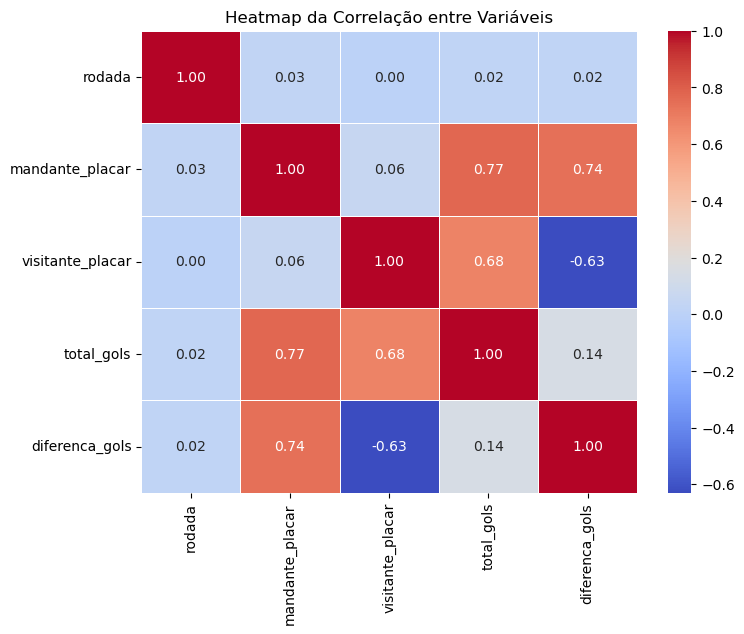

In [75]:
df_corr = df[['rodada', 'mandante_placar', 'visitante_placar', 'total_gols', 'diferenca_gols']]

corr = df_corr.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Heatmap da Correlação entre Variáveis")
plt.show()